# this notebook explores the watersheds previously separated in watershed_cluster_selection: most importantly, we plot them individually

In [1]:
# set working directory
import os
os.chdir('/dat1/openonic/Drifters') # directory

In [97]:
# dependencies
import pandas as pd
import scipy.interpolate as sci_int
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci_stats
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import hdbscan

In [17]:
# import selected watersheds
SE_Pacific = pd.read_csv('selected_clusters/cluster_0_data.csv')
Europe = pd.read_csv('selected_clusters/cluster_3_data.csv')
SW_SA = pd.read_csv('selected_clusters/cluster_5_data.csv')
S_Pacific_Islands = pd.read_csv('selected_clusters/cluster_6_data.csv')
Alaska_Canada = pd.read_csv('selected_clusters/cluster_7_data.csv')
Brazil = pd.read_csv('selected_clusters/cluster_10_data.csv')
Caribbean_Florida = pd.read_csv('selected_clusters/cluster_12_data.csv')
Indian_Ocean = pd.read_csv('selected_clusters/cluster_14_data.csv')
Asia = pd.read_csv('selected_clusters/cluster_16_data.csv')

In [18]:
# Set the random seed
random_seed = 42
np.random.seed(random_seed)

In [133]:
SE_Pacific

,id,time,lat,lon,ve,vn,time_to_beach,HDBSCAN
0,39644,1075075200,-10.75534,-150.26509,0.1133,0.2255,2336400.0,0.0
1,39644,1075078800,-10.74812,-150.26286,0.1089,0.2250,2332800.0,0.0
2,39644,1075082400,-10.74074,-150.25822,0.1697,0.2124,2329200.0,0.0
3,39644,1075086000,-10.73384,-150.25182,0.1778,0.2124,2325600.0,0.0
4,39644,1075089600,-10.72694,-150.24548,0.1798,0.2124,2322000.0,0.0
...,...,...,...,...,...,...,...,...
454607,300234066819370,1585684800,-12.25848,-137.84074,-0.2827,-0.0687,14400.0,0.0
454608,300234066819370,1585688400,-12.26082,-137.85028,-0.3161,-0.0895,10800.0,0.0
454609,300234066819370,1585692000,-12.26383,-137.86064,-0.3062,-0.0931,7200.0,0.0
454610,300234066819370,1585695600,-12.26709,-137.87070,-0.3001,-0.1116,3600.0,0.0


### Let's plot each watershed by itself (see ENSO_beach_prob_temporal.ipynb for ENSO 1 year difference corresponding to these plots)

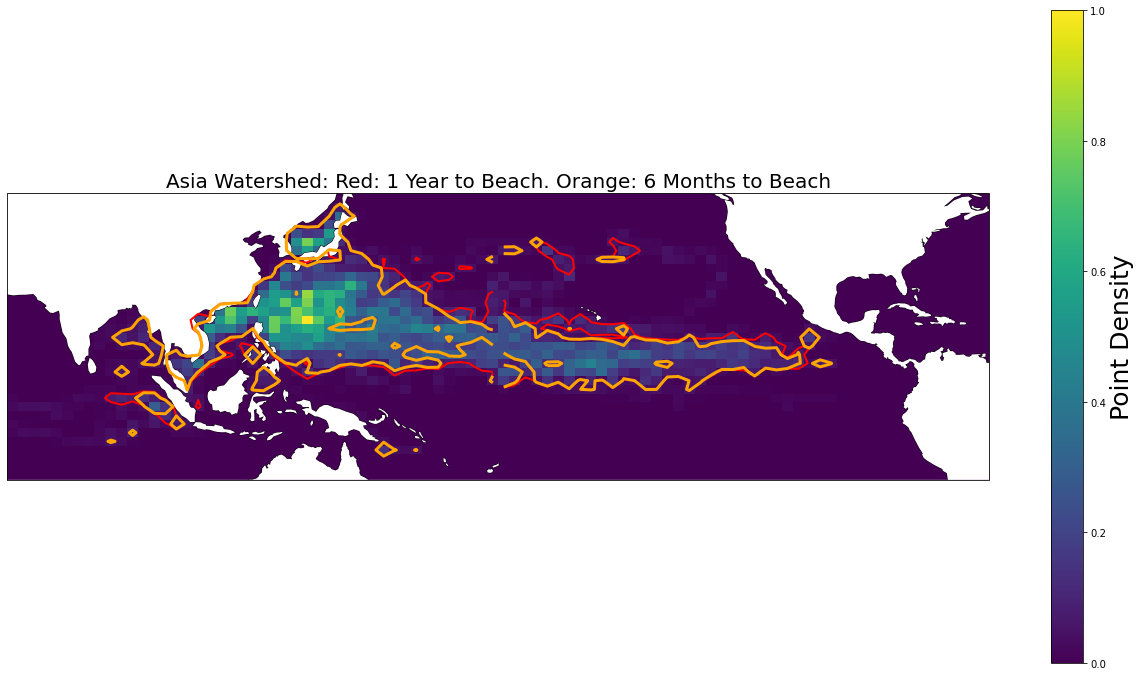

In [153]:
# Asia
# define cluster:
cluster = Asia

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.set_extent([120, -120, -20, 50], crs=ccrs.PlateCarree(central_longitude=-180))



cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)


# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))

# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())


# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())


cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
#ax.set_aspect('auto')
plt.title('Asia Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

ax.coastlines(color = 'black')
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='none', facecolor='white')
ax.add_feature(land_feature)

Text(0.5, 1.0, 'Indian_Ocean Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach')

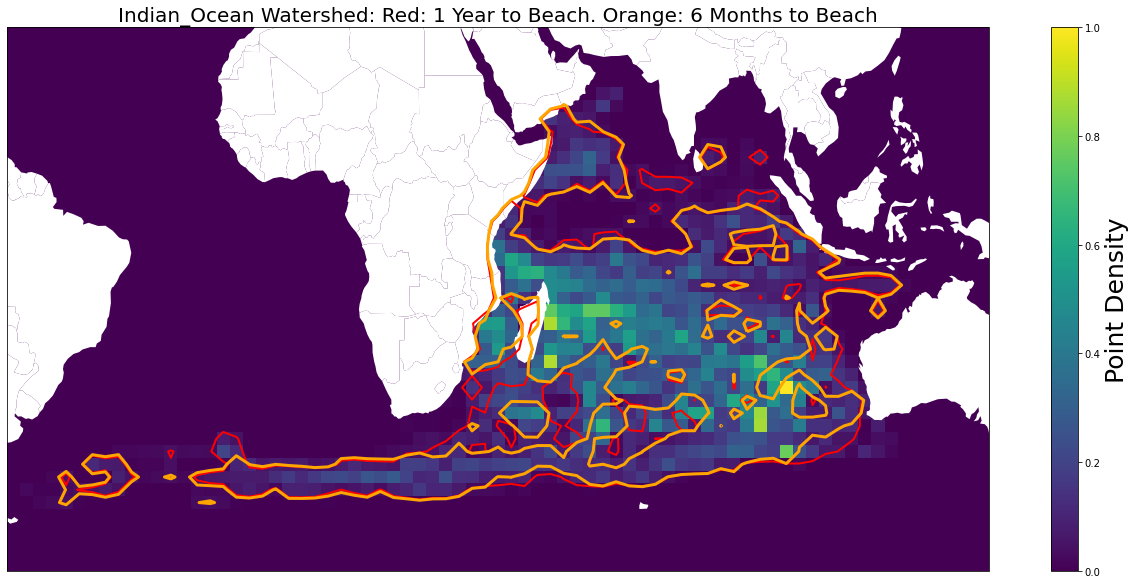

In [157]:
# Indian_Ocean
# define cluster:
cluster = Indian_Ocean

fig = plt.figure(figsize=(22, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-60, 140, -60, 30], crs=ccrs.PlateCarree())

# Load the world shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the land polygons
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))


# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())

# Plot the land polygons with white face color, no edge
land.plot(ax=ax, color='white', edgecolor='none')
Antarctica.plot(ax=ax, color='white', edgecolor='none')

cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
ax.set_aspect('auto')
plt.title('Indian_Ocean Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

Text(0.5, 1.0, 'Caribbean_Florida Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach')

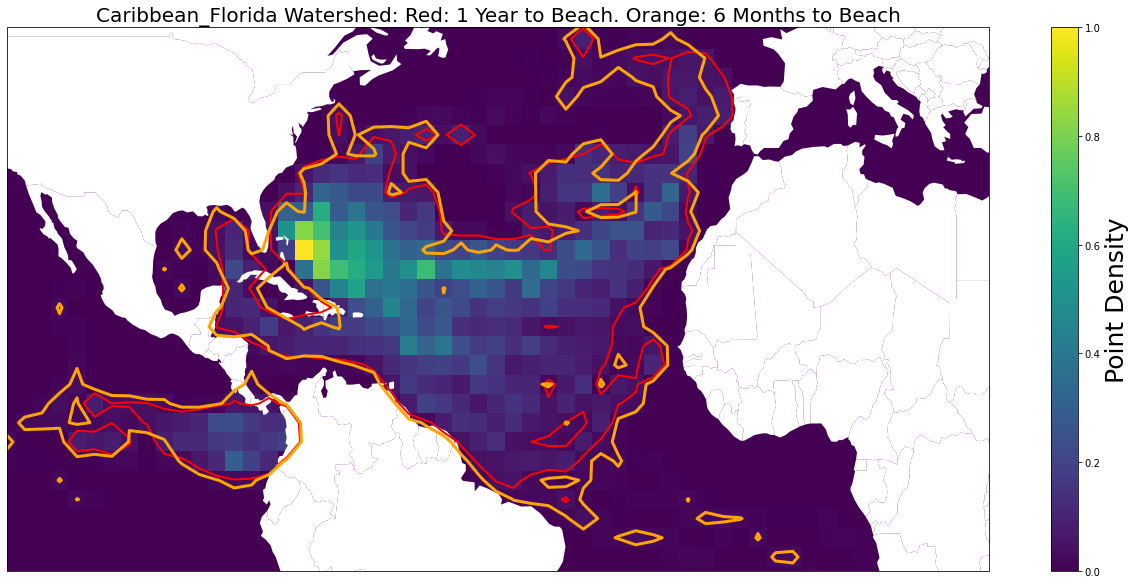

In [158]:
# Caribbean_Florida
# define cluster:
cluster = Caribbean_Florida

fig = plt.figure(figsize=(22, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-120, 30, -10, 50], crs=ccrs.PlateCarree())

# Load the world shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the land polygons
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))


# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())

# Plot the land polygons with white face color, no edge
land.plot(ax=ax, color='white', edgecolor='none')
Antarctica.plot(ax=ax, color='white', edgecolor='none')

cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
ax.set_aspect('auto')
plt.title('Caribbean_Florida Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

Text(0.5, 1.0, 'Brazil Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach')

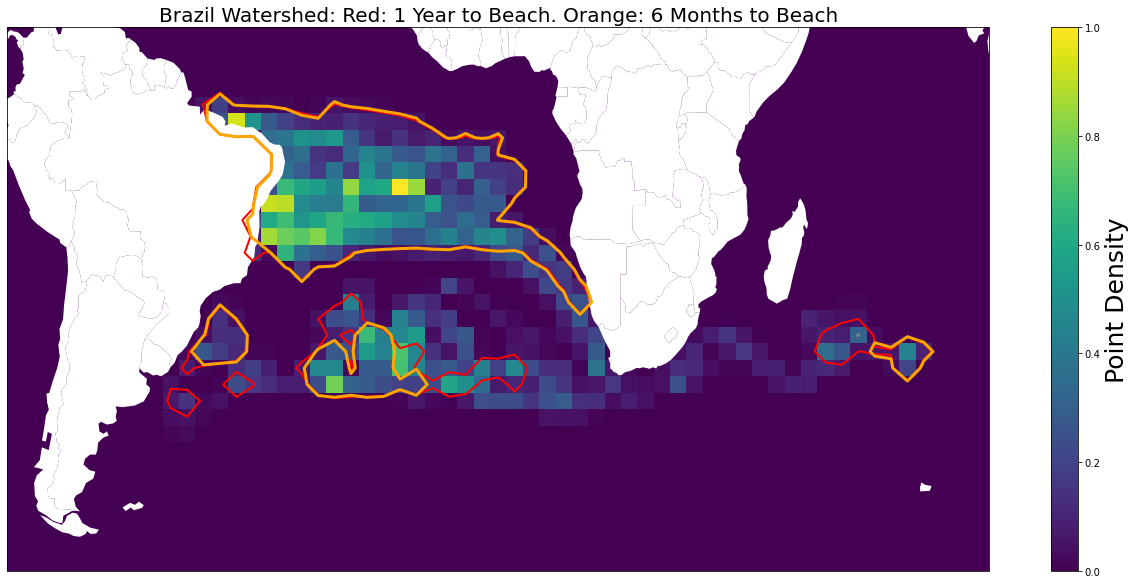

In [160]:
# Brazil
# define cluster:
cluster = Brazil

fig = plt.figure(figsize=(22, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 80, -60, 10], crs=ccrs.PlateCarree())

# Load the world shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the land polygons
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))


# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())

# Plot the land polygons with white face color, no edge
land.plot(ax=ax, color='white', edgecolor='none')
Antarctica.plot(ax=ax, color='white', edgecolor='none')

cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
ax.set_aspect('auto')
plt.title('Brazil Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

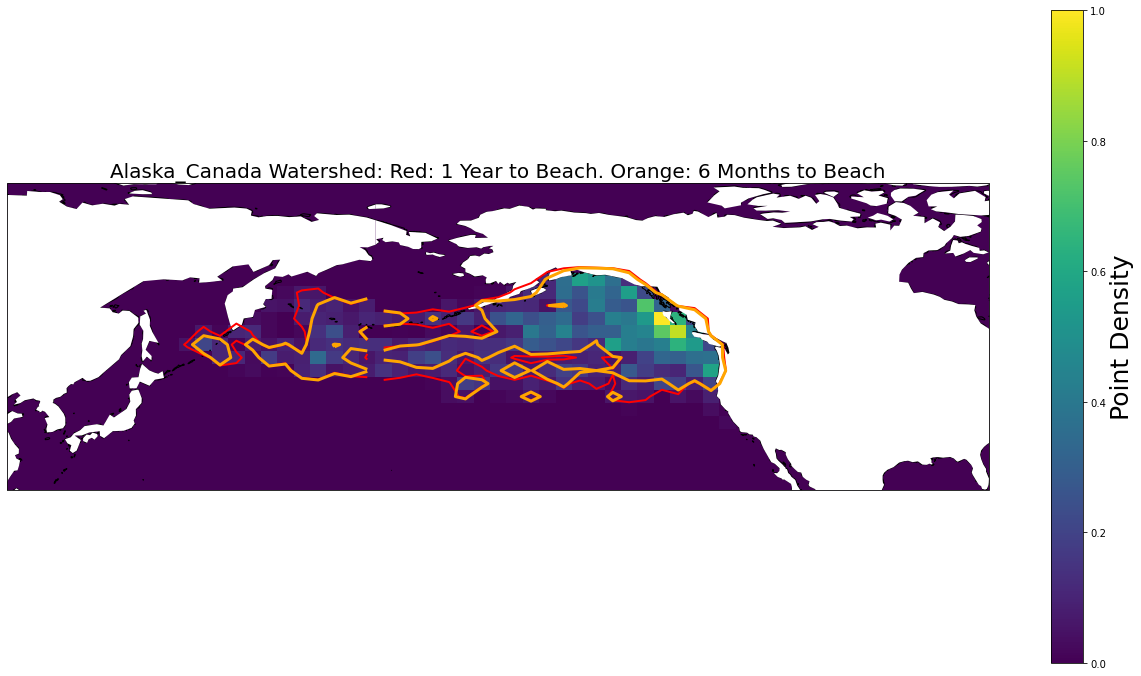

In [161]:
# Alaska_Canada
# define cluster:
cluster = Alaska_Canada

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.set_extent([100, -60, 25, 75], crs=ccrs.PlateCarree(central_longitude=-180))



cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)


# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))


# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())


cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
#ax.set_aspect('auto')
plt.title('Alaska_Canada Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

ax.coastlines(color = 'black')
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='none', facecolor='white')
ax.add_feature(land_feature)

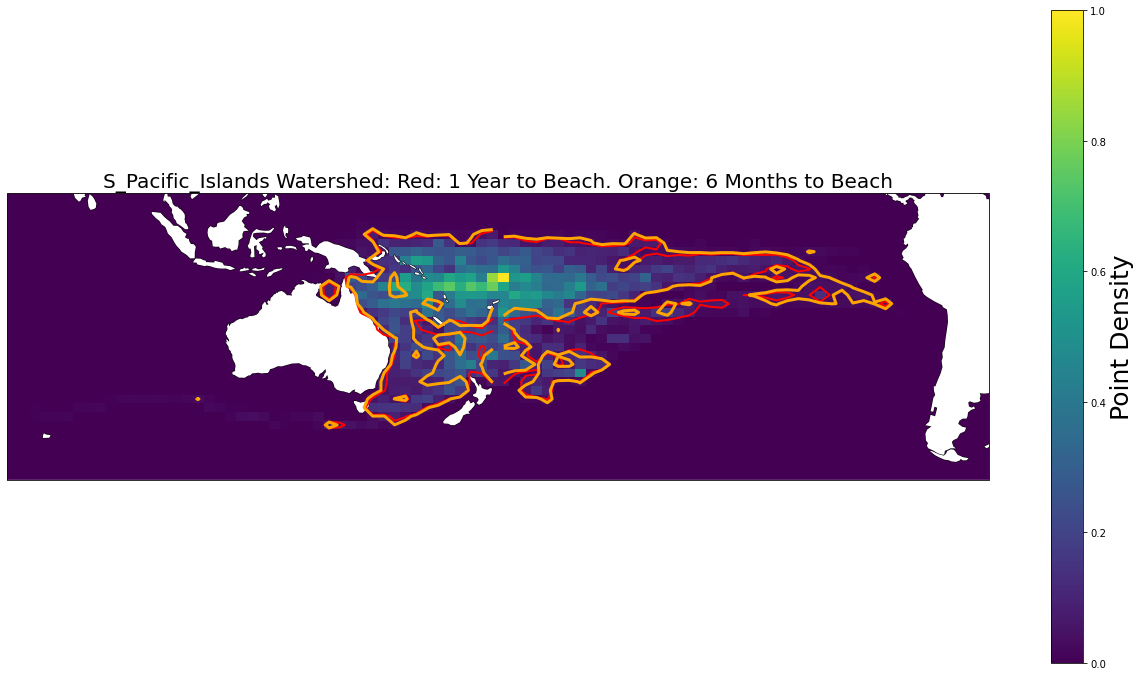

In [162]:
# S_Pacific_Islands
# define cluster:
cluster = S_Pacific_Islands

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.set_extent([120, -120, -60, 10], crs=ccrs.PlateCarree(central_longitude=-180))



cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)


# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))

# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())


cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
#ax.set_aspect('auto')
plt.title('S_Pacific_Islands Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

ax.coastlines(color = 'black')
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='none', facecolor='white')
ax.add_feature(land_feature)

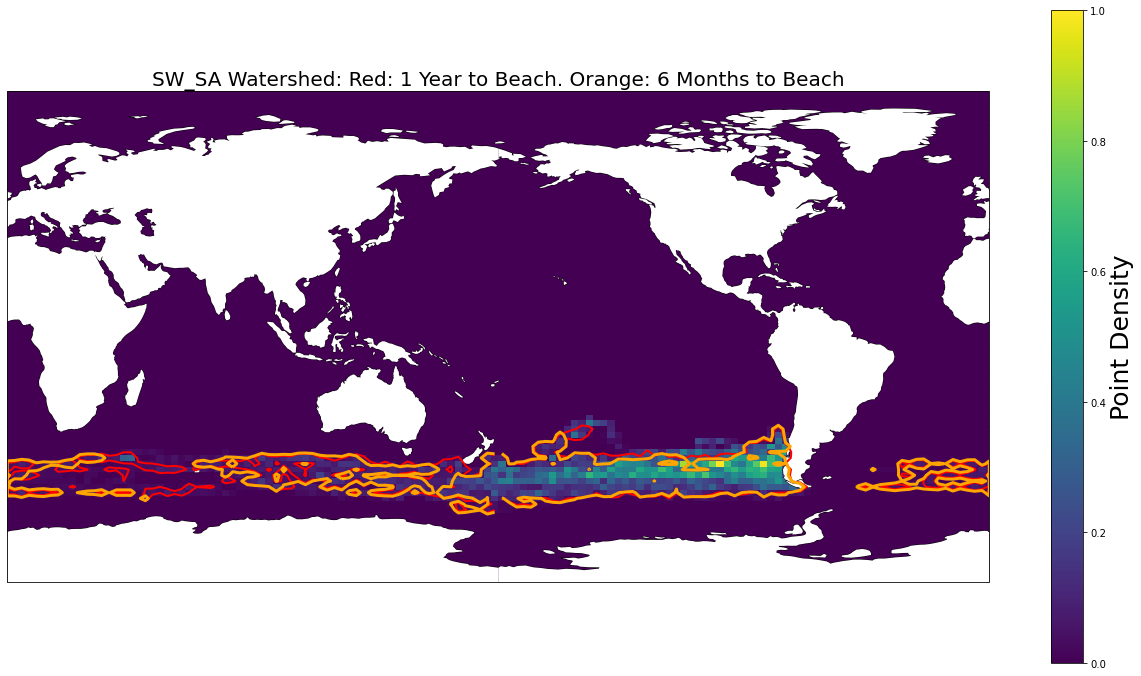

In [163]:
# SW_SA
# define cluster:
cluster = SW_SA

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.set_extent([180, -180, -90, 90], crs=ccrs.PlateCarree(central_longitude=-180))



cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)


# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))


# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())


cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
#ax.set_aspect('auto')
plt.title('SW_SA Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

ax.coastlines(color = 'black')
land_feature = cfeature.NaturalEarthFeature('physical', 'land', '110m',
                                            edgecolor='none', facecolor='white')
ax.add_feature(land_feature)

Text(0.5, 1.0, 'Europe Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach')

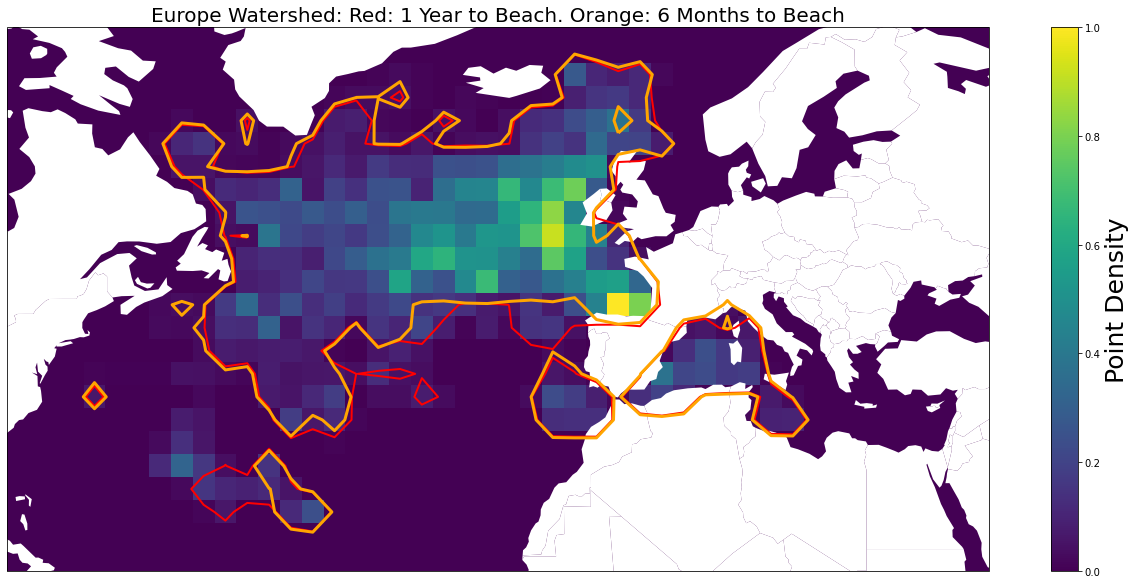

In [164]:
# Europe
# define cluster:
cluster = Europe

fig = plt.figure(figsize=(22, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-80, 40, 20, 70], crs=ccrs.PlateCarree())

# Load the world shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the land polygons
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))

# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())

# Plot the land polygons with white face color, no edge
land.plot(ax=ax, color='white', edgecolor='none')
Antarctica.plot(ax=ax, color='white', edgecolor='none')

cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
ax.set_aspect('auto')
plt.title('Europe Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

Text(0.5, 1.0, 'SE_Pacific Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach')

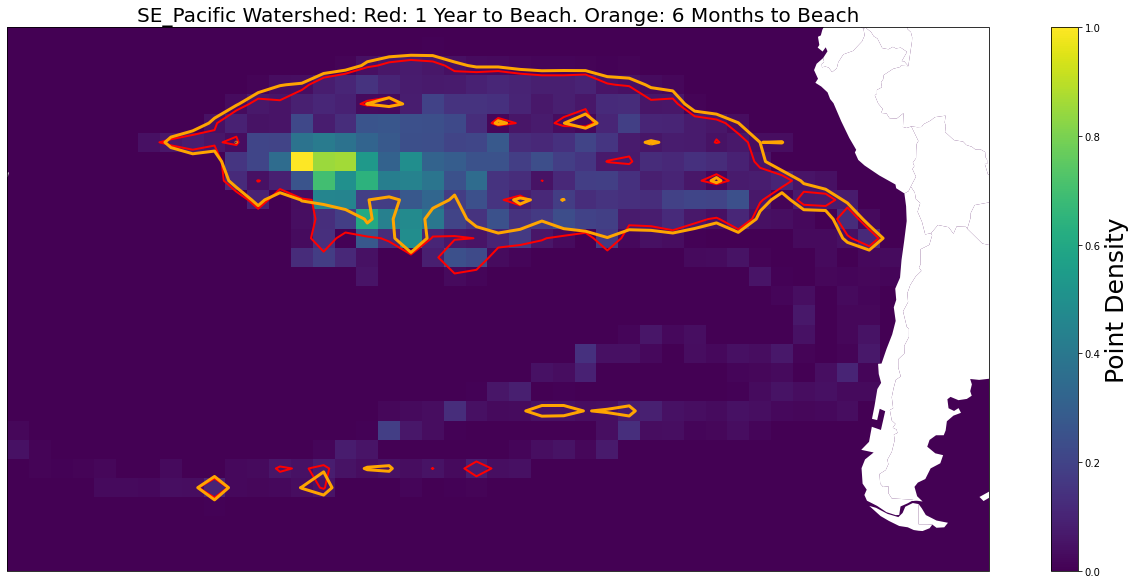

In [165]:
# SE_Pacific
# define cluster:
cluster = SE_Pacific

fig = plt.figure(figsize=(22, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, -60, -60, 0], crs=ccrs.PlateCarree())

# Load the world shapefile from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the land polygons
land = world[world['continent'] != 'Antarctica']
Antarctica = world[world['continent'] == 'Antarctica']

cmap = plt.cm.get_cmap("viridis").copy()


###full
# Define the grid for the heatmap
n_lons, n_lats = 135, 85  # Define the number of grid cells
lon_bins = np.linspace(-180, 180, n_lons + 1)
lat_bins = np.linspace(-90, 90, n_lats + 1)

# initialize mesh
heatmap_data_normalized = np.zeros((n_lats, n_lons))

latitudes = []
longitudes = []
latitudes12 = []
longitudes12 = []
latitudes6 = []
longitudes6 = []
latitudes3 = []
longitudes3 = []
latitudes1 = []
longitudes1 = []

for ID in np.unique(cluster['id']):
    trajectory = cluster[cluster['id'] == ID]

    latest_time = max(trajectory['time_to_beach'])
    start_time = latest_time - 15552000000000 # Full
    start_time12 = latest_time - 31536000 # 12m
    start_time6 = latest_time - 15552000 # 6m
    start_time3 = latest_time - 7890000 # 3m
    start_time1 = latest_time - 2629800 # 1m

    latest_data_all = trajectory[trajectory['time_to_beach'] <= latest_time]

    latest_data = latest_data_all[latest_data_all['time_to_beach'] >= start_time]
    latest_data12 = latest_data_all[latest_data_all['time_to_beach'] >= start_time12]
    latest_data6 = latest_data_all[latest_data_all['time_to_beach'] >= start_time6]
    latest_data3 = latest_data_all[latest_data_all['time_to_beach'] >= start_time3]
    latest_data1 = latest_data_all[latest_data_all['time_to_beach'] >= start_time1]

    latitudes += list(latest_data['lat'])
    longitudes += list(latest_data['lon'])

    latitudes12 += list(latest_data12['lat'])
    longitudes12 += list(latest_data12['lon'])

    latitudes6 += list(latest_data6['lat'])
    longitudes6 += list(latest_data6['lon'])

    latitudes3 += list(latest_data3['lat'])
    longitudes3 += list(latest_data3['lon'])

    latitudes1 += list(latest_data1['lat'])
    longitudes1 += list(latest_data1['lon'])




# Calculate the 2D histogram (density plot) of point density
heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2

# append to previous clusters
heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))


###12

# Calculate the 2D histogram (density plot) of point density
heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

###6

# Calculate the 2D histogram (density plot) of point density
heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

###3

# Calculate the 2D histogram (density plot) of point density
heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


###1

# Calculate the 2D histogram (density plot) of point density
heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

# Normalize the data to be in the range [0, 1]
heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))

# ALL CONTOURS
# Repeat the process for other plots with increasing linewidth
#linewidths = [3, 2.75, 2.5, 2.25, 2][::-1]
#colors = sns.dark_palette("white", n_colors=len(linewidths), reverse=True).as_hex()
#for data_normalized, linewidth, color in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths, colors):
#    # Add contour lines at the specified level (0.05 in this case)
#    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# 1 YEAR and 6 MONTHS TO BEACH CONTOURS
# Repeat the process for other plots with increasing linewidth
linewidths = [3, 2][::-1]
colors = ['red', 'orange']
for data_normalized, linewidth, color in zip([heatmap_data_normalized12, heatmap_data_normalized6], linewidths, colors):
    # Add contour lines at the specified level (0.05 in this case)
    contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors=color, linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())

# Plot the filled contour for normalized heatmap
mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())

# Plot the land polygons with white face color, no edge
land.plot(ax=ax, color='white', edgecolor='none')
Antarctica.plot(ax=ax, color='white', edgecolor='none')

cbar = plt.colorbar(mesh, label='Point Density')
cbar.set_label('Point Density', fontsize=25)
ax.set_aspect('auto')
plt.title('SE_Pacific Watershed: Red: 1 Year to Beach. Orange: 6 Months to Beach', fontsize = 20)

### Some further exploration of the Asia watershed

In [5]:
Asia_test = Asia.drop(columns=['HDBSCAN'])

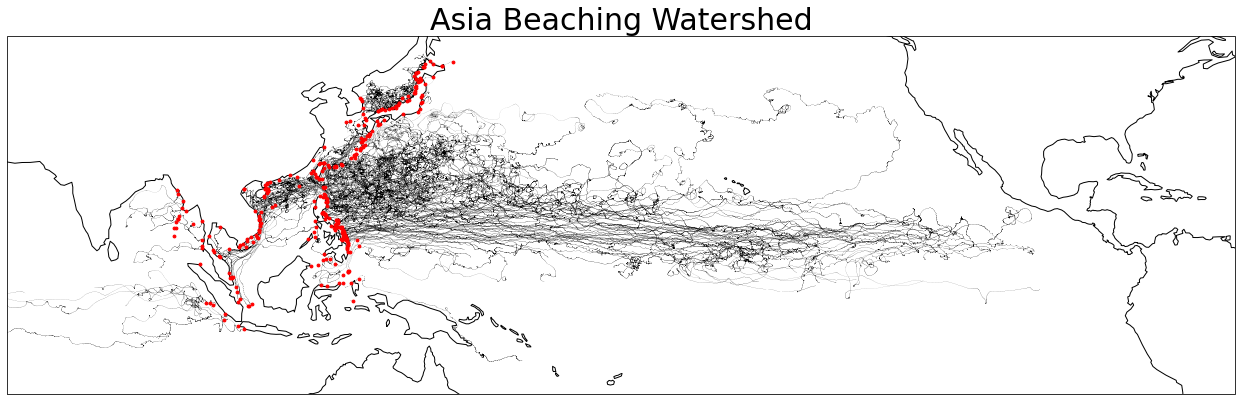

In [6]:
beach = Asia_test
beaching_points = Asia_test.drop_duplicates(subset='id', keep='last')

point_size = 0.00005

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=-180))
ax.set_extent([120, -120, -20, 50], crs=ccrs.PlateCarree(central_longitude=-180))
ax.coastlines()

# Scatter plot with colors based on the custom colormap
scatter2 = ax.scatter(
    beach['lon'],
    beach['lat'],
    marker='o',
    c='k',
    cmap='viridis',
    transform=ccrs.PlateCarree(),  # Specify the coordinate reference system
    s=point_size,
    alpha=0.7
)

ax.scatter(beaching_points['lon'], beaching_points['lat'], color='r', transform=ccrs.PlateCarree(), s = 8)  # Specify the coordinate reference system

plt.title('Asia Beaching Watershed', fontsize = 30)
plt.show()

In [7]:
np.max(Asia_test['time_to_beach'])/60/60/24/365

4.000114155251142

In [8]:
beach = Asia_test
# get features for clustering and normalize to close to scale of lat/lon with lat/lon weighted for clustering AND RUN HDBSCAN TWICE
# get beach points for beach lat/lon
last_points_input = beach.drop_duplicates(subset='id', keep='last')

# input feature: beach latitude
beach_lat = np.array(last_points_input['lat']).reshape(-1,1)

# input feature: beach longitude
beach_lon = np.array(last_points_input['lon']).reshape(-1,1)

# initialize input
cluster_input = np.column_stack((beach_lat, beach_lon))#, time_normalized, v_avg_normalized))

hdb = hdbscan.HDBSCAN(
    min_cluster_size = 20, # minimum number beach points in a cluster
    cluster_selection_epsilon = 7) # clusters below distance threshold are merged
hdb.fit(cluster_input)
labels = hdb.labels_

#organize dataframe of ids and HDBSCAN cluster labels
cluster_df = pd.DataFrame({'id': last_points_input['id'], 'HDBSCAN': labels})

histogram = plt.hist(cluster_df['HDBSCAN'], bins = len(np.unique(cluster_df['HDBSCAN'])))
plt.close() # do not display histogram
cluster_ids = []
count = np.min(cluster_df['HDBSCAN'])
for i in histogram[0]:
    if i > 20:
        cluster_ids.append(count)
    count += 1
    
# remove unclustered 'noise' and select clusters
cluster_ids = cluster_ids[1:]
beach_clusters_select = cluster_df[cluster_df['HDBSCAN'].isin(cluster_ids)]

# merge cluster labels with the original data

beach_clusters = pd.merge(beach.set_index('id'), beach_clusters_select.set_index('id'), left_index=True, right_index=True, how='left').reset_index()
beach_clusters = beach_clusters[beach_clusters['id'].isin(beach_clusters_select['id'])]

In [9]:
# NOW INPUT CLUSTERED DATA INTO NEW HDBSCAN
# get beach points for beach lat/lon
last_points_input = beach_clusters.drop_duplicates(subset='id', keep='last')

# input feature: beach latitude
beach_lat = np.array(last_points_input['lat']).reshape(-1,1)

# input feature: beach longitude
beach_lon = np.array(last_points_input['lon']).reshape(-1,1)

# initialize input
cluster_input = np.column_stack((beach_lat, beach_lon))#, time_normalized, v_avg_normalized))

hdb = hdbscan.HDBSCAN(
    min_cluster_size = 5, # minimum number beach points in a cluster
    cluster_selection_epsilon = 8) # clusters below distance threshold are merged
hdb.fit(cluster_input)
labels = hdb.labels_

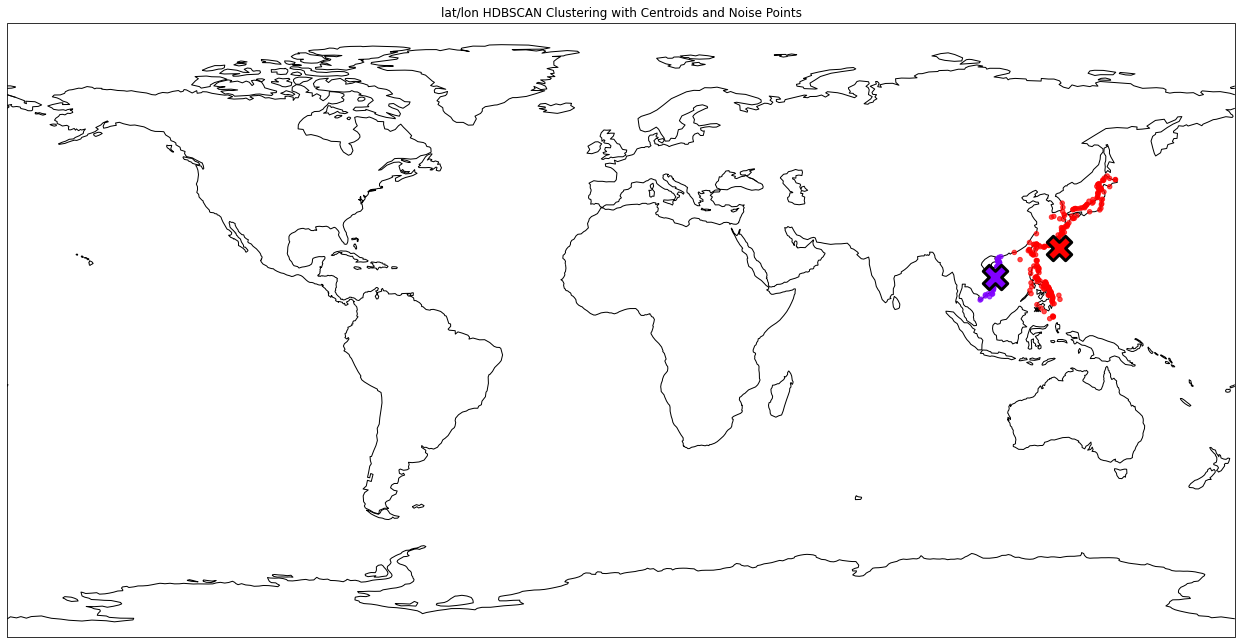

In [10]:
fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
#left right bottom top
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()
point_size = 10

# Plot noise points as small 'x'
noise_mask = (labels == -1)
ax.scatter(cluster_input[noise_mask, 1], cluster_input[noise_mask, 0], marker='x', color='black', s=20, label='Noise Points')

# Scatter plot with colors based on HDBSCAN labels
scatter1 = plt.scatter(
    cluster_input[labels != -1, 1],
    cluster_input[labels != -1, 0],
    marker='o',
    c=labels[labels != -1],
    cmap='rainbow',
    alpha=0.7,
    s=20
)

# Plot centroids with the same colors as corresponding points
for cluster_id in set(labels):
    cluster_mask = (labels == cluster_id)

    if cluster_id != -1:
        cluster_points = cluster_input[cluster_mask]
        centroid = np.mean(cluster_points, axis=0)
        color = scatter1.to_rgba(cluster_id)  # Get the color from the first scatter plot
        ax.scatter(centroid[1], centroid[0], marker='X', color=color, edgecolor='black', linewidths=3, s=600, label=f'Cluster {cluster_id} Centroid')

# Get the colors used in the first figure
colors_first_figure = scatter1.to_rgba(scatter1.get_array())

#ax.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('lat/lon HDBSCAN Clustering with Centroids and Noise Points')
plt.show()

In [11]:
unique_labels_figure1 = np.unique(cluster_df['HDBSCAN'])

# organize dataframe of ids and HDBSCAN cluster labels
cluster_df = pd.DataFrame({'id': last_points_input['id'], 'HDBSCAN': labels})

histogram = plt.hist(cluster_df['HDBSCAN'], bins = len(np.unique(cluster_df['HDBSCAN'])))
plt.close() # do not display histogram
cluster_ids = []
count = np.min(cluster_df['HDBSCAN'])
for i in histogram[0]:
    if i > 0:
        cluster_ids.append(count)
    count += 1
    
# remove unclustered 'noise' and select clusters
cluster_ids = cluster_ids[1:]
beach_clusters_select = cluster_df[cluster_df['HDBSCAN'].isin(cluster_ids)]

# resample without replacement
num_trajectories = round(len(beach_clusters_select)/2)
resampled_df = beach_clusters_select.sample(n=num_trajectories, replace=False, random_state=42)
resampled_df.reset_index(drop=True, inplace=True)


# merge cluster labels with the original data

beach_clusters = pd.merge(beach.set_index('id'), resampled_df.set_index('id'), left_index=True, right_index=True, how='left').reset_index()
beach_clusters = beach_clusters[beach_clusters['id'].isin(resampled_df['id'])]

# Create a colormap with distinct colors for each cluster label
colors_custom_cmap = plt.cm.get_cmap('rainbow', len(unique_labels_figure1))

# Create a dictionary to map each cluster label to its corresponding color
cluster_color_mapping = dict(zip(unique_labels_figure1, range(len(unique_labels_figure1))))

# Apply the mapping to the HDBSCAN labels in the beach_clusters DataFrame
beach_clusters['Color'] = beach_clusters['HDBSCAN'].map(cluster_color_mapping)

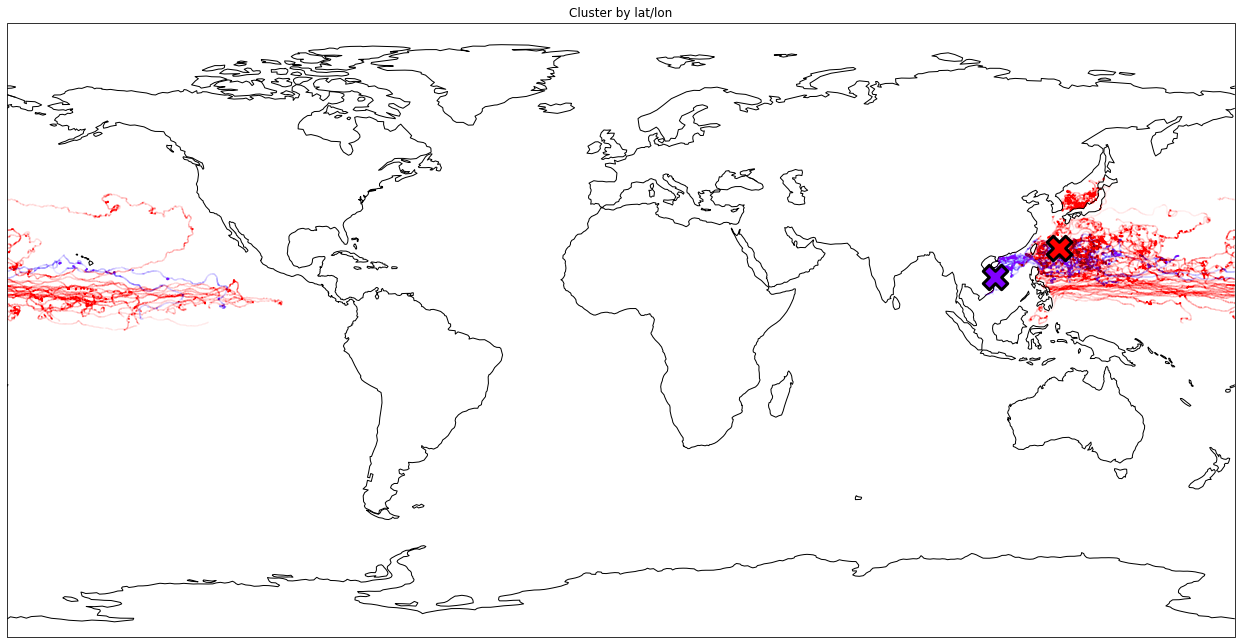

In [12]:
# Plotting code for next fig

point_size = 0.00005

fig = plt.figure(figsize=(22, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.coastlines()

# Scatter plot with colors based on the custom colormap
scatter2 = plt.scatter(
    beach_clusters['lon'],
    beach_clusters['lat'],
    marker='o',
    c=beach_clusters['Color'],
    cmap=colors_custom_cmap,
    s=point_size,
    alpha=0.7
)


# Plot centroids with the same colors as corresponding points
for cluster_id in set(labels):
    cluster_mask = (labels == cluster_id)

    if cluster_id in np.unique(beach_clusters['HDBSCAN']):
        cluster_points = cluster_input[cluster_mask]
        centroid = np.mean(cluster_points, axis=0)
        color = scatter1.to_rgba(cluster_id)  # Get the color from the first scatter plot
        ax.scatter(centroid[1], centroid[0], marker='X', color=color, edgecolor='black', linewidths=3, s=600, label=f'Cluster {cluster_id} Centroid')


# Add colorbar
#cbar = plt.colorbar(scatter2, orientation='vertical', pad=0.02, ticks=unique_labels_figure2)
#cbar.set_label('HDBSCAN Cluster', fontsize=16)
#cbar.ax.tick_params(labelsize=14)

plt.title('Cluster by lat/lon')

plt.show()

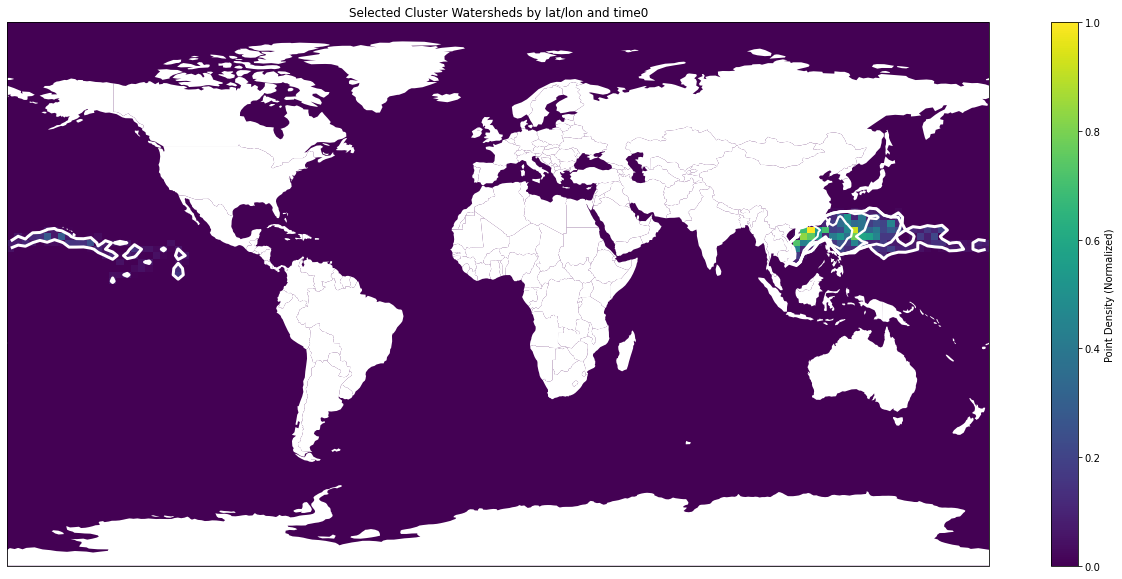

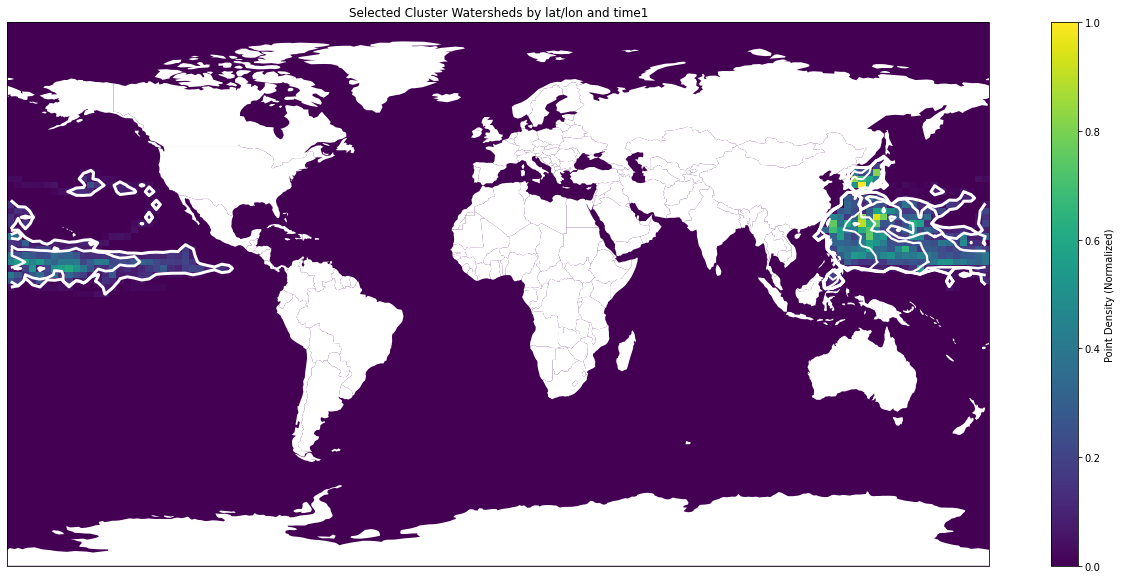

In [13]:
cluster_outputs = []
count = 0
for i in np.unique(beach_clusters['HDBSCAN']):
    cluster_outputs.append(beach_clusters[beach_clusters['HDBSCAN'] == i])

#selected_clusters = [cluster_outputs[i] for i in [0, 1, 3, 7, 9, 10, 15,16,18]]
selected_clusters = cluster_outputs
#cmap.set_bad('grey')

for cluster in selected_clusters:
    
    fig = plt.figure(figsize=(22, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

    # Load the world shapefile from GeoPandas
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Extract the land polygons
    land = world[world['continent'] != 'Antarctica']
    Antarctica = world[world['continent'] == 'Antarctica']

    cmap = plt.cm.get_cmap("viridis").copy()
    
    
    ###full
    # Define the grid for the heatmap
    n_lons, n_lats = 135, 85  # Define the number of grid cells
    lon_bins = np.linspace(-180, 180, n_lons + 1)
    lat_bins = np.linspace(-90, 90, n_lats + 1)

    # initialize mesh
    heatmap_data_normalized = np.zeros((n_lats, n_lons))
    
    latitudes = []
    longitudes = []
    latitudes12 = []
    longitudes12 = []
    latitudes6 = []
    longitudes6 = []
    latitudes3 = []
    longitudes3 = []
    latitudes1 = []
    longitudes1 = []

    for ID in np.unique(cluster['id']):
        trajectory = cluster[cluster['id'] == ID]

        latest_time = max(trajectory['time'])
        start_time = latest_time - 15552000000000 # Full
        start_time12 = latest_time - 31536000 # 12m
        start_time6 = latest_time - 15552000 # 6m
        start_time3 = latest_time - 7890000 # 3m
        start_time1 = latest_time - 2629800 # 1m

        latest_data_all = trajectory[trajectory['time'] <= latest_time]

        latest_data = latest_data_all[latest_data_all['time'] >= start_time]
        latest_data12 = latest_data_all[latest_data_all['time'] >= start_time12]
        latest_data6 = latest_data_all[latest_data_all['time'] >= start_time6]
        latest_data3 = latest_data_all[latest_data_all['time'] >= start_time3]
        latest_data1 = latest_data_all[latest_data_all['time'] >= start_time1]

        latitudes += list(latest_data['lat'])
        longitudes += list(latest_data['lon'])

        latitudes12 += list(latest_data12['lat'])
        longitudes12 += list(latest_data12['lon'])

        latitudes6 += list(latest_data6['lat'])
        longitudes6 += list(latest_data6['lon'])

        latitudes3 += list(latest_data3['lat'])
        longitudes3 += list(latest_data3['lon'])

        latitudes1 += list(latest_data1['lat'])
        longitudes1 += list(latest_data1['lon'])




    # Calculate the 2D histogram (density plot) of point density
    heatmap_data, _, _ = np.histogram2d(latitudes, longitudes, bins=[lat_bins, lon_bins], density=True)

    # Normalize the data to be in the range [0, 1]
    heatmap_data_normalized_cluster = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

    lon_centers_cluster = (lon_bins[1:] + lon_bins[:-1]) / 2
    lat_centers_cluster = (lat_bins[1:] + lat_bins[:-1]) / 2
    
    # append to previous clusters
    heatmap_data_normalized = (heatmap_data - np.min(heatmap_data)) / (np.max(heatmap_data) - np.min(heatmap_data))

    
    ###12

    # Calculate the 2D histogram (density plot) of point density
    heatmap_data12, _, _ = np.histogram2d(latitudes12, longitudes12, bins=[lat_bins, lon_bins], density=True)

    # Normalize the data to be in the range [0, 1]
    heatmap_data_normalized12 = (heatmap_data12 - np.min(heatmap_data12)) / (np.max(heatmap_data12) - np.min(heatmap_data12))

    ###6

    # Calculate the 2D histogram (density plot) of point density
    heatmap_data6, _, _ = np.histogram2d(latitudes6, longitudes6, bins=[lat_bins, lon_bins], density=True)

    # Normalize the data to be in the range [0, 1]
    heatmap_data_normalized6 = (heatmap_data6 - np.min(heatmap_data6)) / (np.max(heatmap_data6) - np.min(heatmap_data6))

    ###3

    # Calculate the 2D histogram (density plot) of point density
    heatmap_data3, _, _ = np.histogram2d(latitudes3, longitudes3, bins=[lat_bins, lon_bins], density=True)

    # Normalize the data to be in the range [0, 1]
    heatmap_data_normalized3 = (heatmap_data3 - np.min(heatmap_data3)) / (np.max(heatmap_data3) - np.min(heatmap_data3))


    ###1

    # Calculate the 2D histogram (density plot) of point density
    heatmap_data1, _, _ = np.histogram2d(latitudes1, longitudes1, bins=[lat_bins, lon_bins], density=True)

    # Normalize the data to be in the range [0, 1]
    heatmap_data_normalized1 = (heatmap_data1 - np.min(heatmap_data1)) / (np.max(heatmap_data1) - np.min(heatmap_data1))


    # Repeat the process for other plots with increasing linewidth
    linewidths = [3, 2.75, 2.5, 2.25, 2]
    for data_normalized, linewidth in zip([heatmap_data_normalized_cluster, heatmap_data_normalized12, heatmap_data_normalized6, heatmap_data_normalized3, heatmap_data_normalized1], linewidths):
        # Add contour lines at the specified level (0.05 in this case)
        contour = plt.contour(lon_centers_cluster, lat_centers_cluster, data_normalized, levels=[0.05], colors='white', linestyles='solid', linewidths=linewidth, transform=ccrs.PlateCarree())
    
    # Plot the filled contour for normalized heatmap
    mesh = ax.pcolormesh(lon_centers_cluster, lat_centers_cluster, heatmap_data_normalized, cmap=cmap, transform=ccrs.PlateCarree())

    # Plot the land polygons with white face color, no edge
    land.plot(ax=ax, color='white', edgecolor='none')
    Antarctica.plot(ax=ax, color='white', edgecolor='none')

    plt.colorbar(mesh, label='Point Density (Normalized)')
    ax.set_aspect('auto')
    plt.title('Selected Cluster Watersheds by lat/lon and time' + str(count))
    

    plt.show()
    count += 1